In [1]:
import requests
import pandas as pd

# can get data from most recent settlement period, but limited by demand +1H after
end_date = pd.Timestamp.now()
settlementDate = (end_date - pd.Timedelta(hours=0.5)).date()
settlementPeriod = (end_date - pd.Timedelta(hours=0.5)).hour * 2

# options - 'PN', 'QPN', 'MILS', 'MELS
dataset = 'PN'

web = 'https://data.elexon.co.uk/bmrs/api/v1/balancing/physical/all?dataset=' + dataset + '&settlementDate=' + str(settlementDate) + '&settlementPeriod=' + str(settlementPeriod) + '&format=json'

r = requests.get(web)
df = pd.DataFrame(r.json()['data'])
# df.index = df['nationalGridBmUnit']
df.set_index('nationalGridBmUnit', inplace=True)
df

,dataset,settlementDate,settlementPeriod,timeFrom,timeTo,levelFrom,levelTo,bmUnit
nationalGridBmUnit,,,,,,,,
BFSE01,PN,2024-02-02,40,2024-02-02T19:59:00Z,2024-02-02T20:00:00Z,-2,0,2__BFSEN005
NFSE02,PN,2024-02-02,40,2024-02-02T19:59:00Z,2024-02-02T20:00:00Z,-1,0,2__NFSEN007
ARNKB-1,PN,2024-02-02,40,2024-02-02T19:59:00Z,2024-02-02T20:00:00Z,-3,0,E_ARNKB-1
CRSSB-1,PN,2024-02-02,40,2024-02-02T19:59:00Z,2024-02-02T20:00:00Z,0,-1,E_CRSSB-1
BHLAW-1,PN,2024-02-02,40,2024-02-02T19:59:00Z,2024-02-02T20:00:00Z,99,98,T_BHLAW-1
...,...,...,...,...,...,...,...,...
AG-FLX02N,PN,2024-02-02,40,2024-02-02T19:30:00Z,2024-02-02T20:00:00Z,0,0,V__NFLEX001
AG-FLX07N,PN,2024-02-02,40,2024-02-02T19:30:00Z,2024-02-02T20:00:00Z,0,0,V__NFLEX002
AG-HEL0DN,PN,2024-02-02,40,2024-02-02T19:30:00Z,2024-02-02T20:00:00Z,0,0,V__NHABI005


<Axes: title={'center': 'Final Physical Notification Level (MW)'}, xlabel='nationalGridBmUnit'>

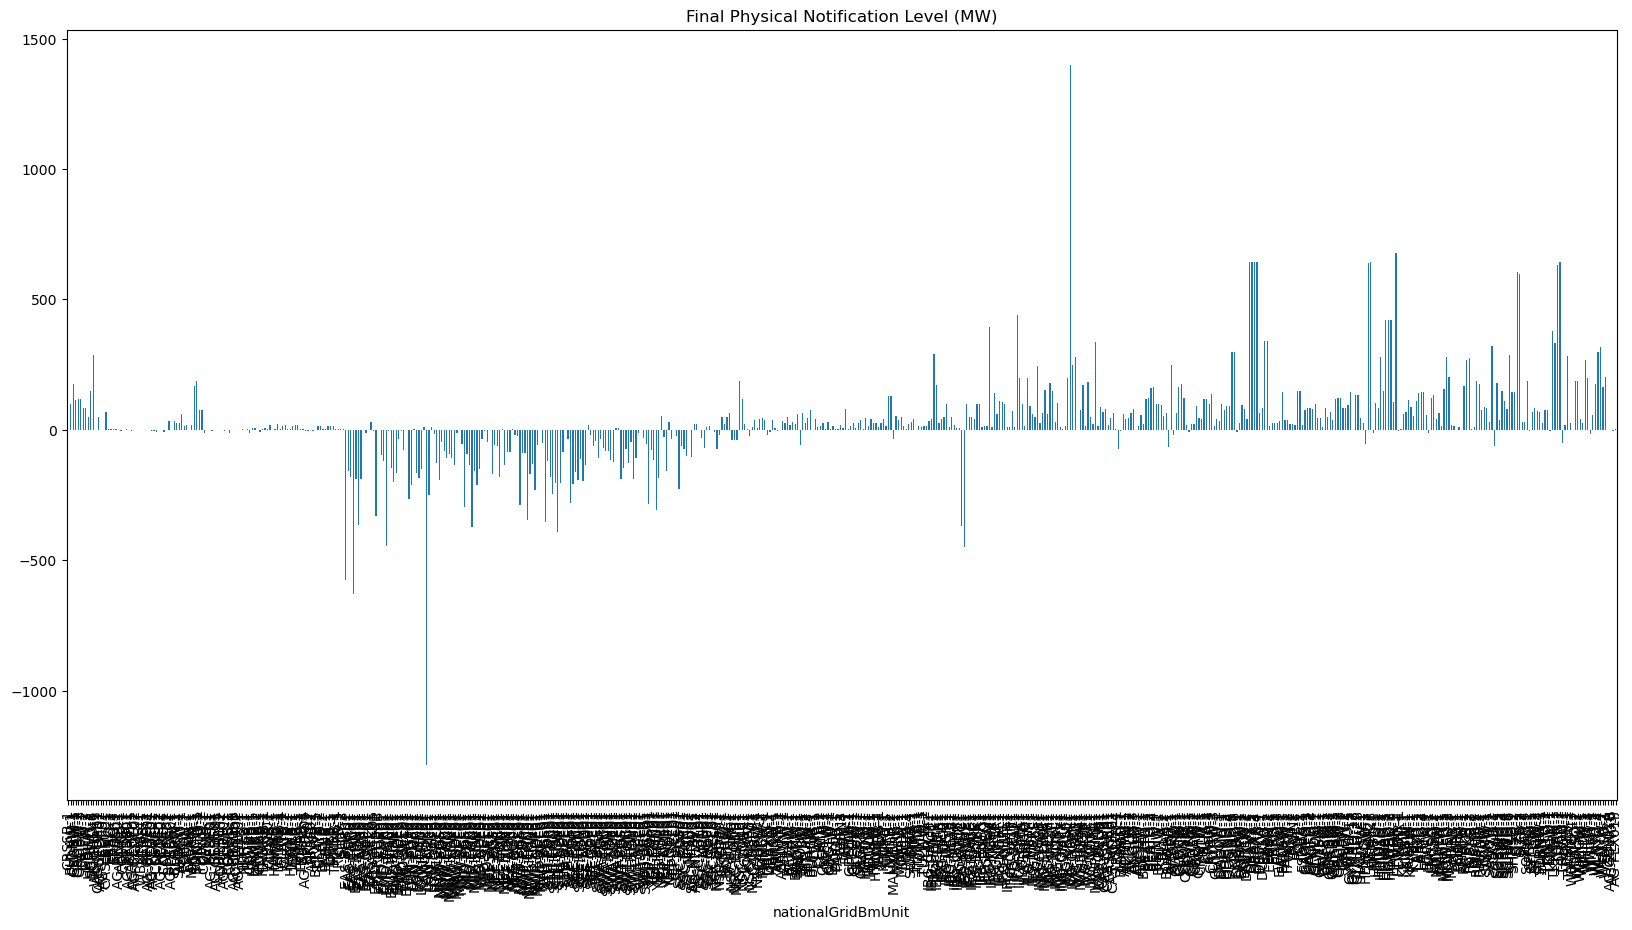

In [2]:
ds_plot = df['levelTo'].fillna('').astype('float')
ds_plot[ds_plot != 0].plot(kind='bar', figsize=(20, 10), title='Final Physical Notification Level (MW)')

In [3]:
ds_plot[ds_plot != 0]

nationalGridBmUnit
CRSSB-1       -1.0
BHLAW-1       98.0
CLDNW-1      174.0
GRGBW-1      113.0
GRGBW-2      119.0
             ...  
WTMSO-1      204.0
ZEN02A        -2.0
AG-GBL01B     -1.0
AG-ZEN03J     -3.0
AG-FLX01P      2.0
Name: levelTo, Length: 614, dtype: float64

<Axes: title={'center': 'Final Physical Notification Level (MW) > 0  (Generation)'}, xlabel='nationalGridBmUnit'>

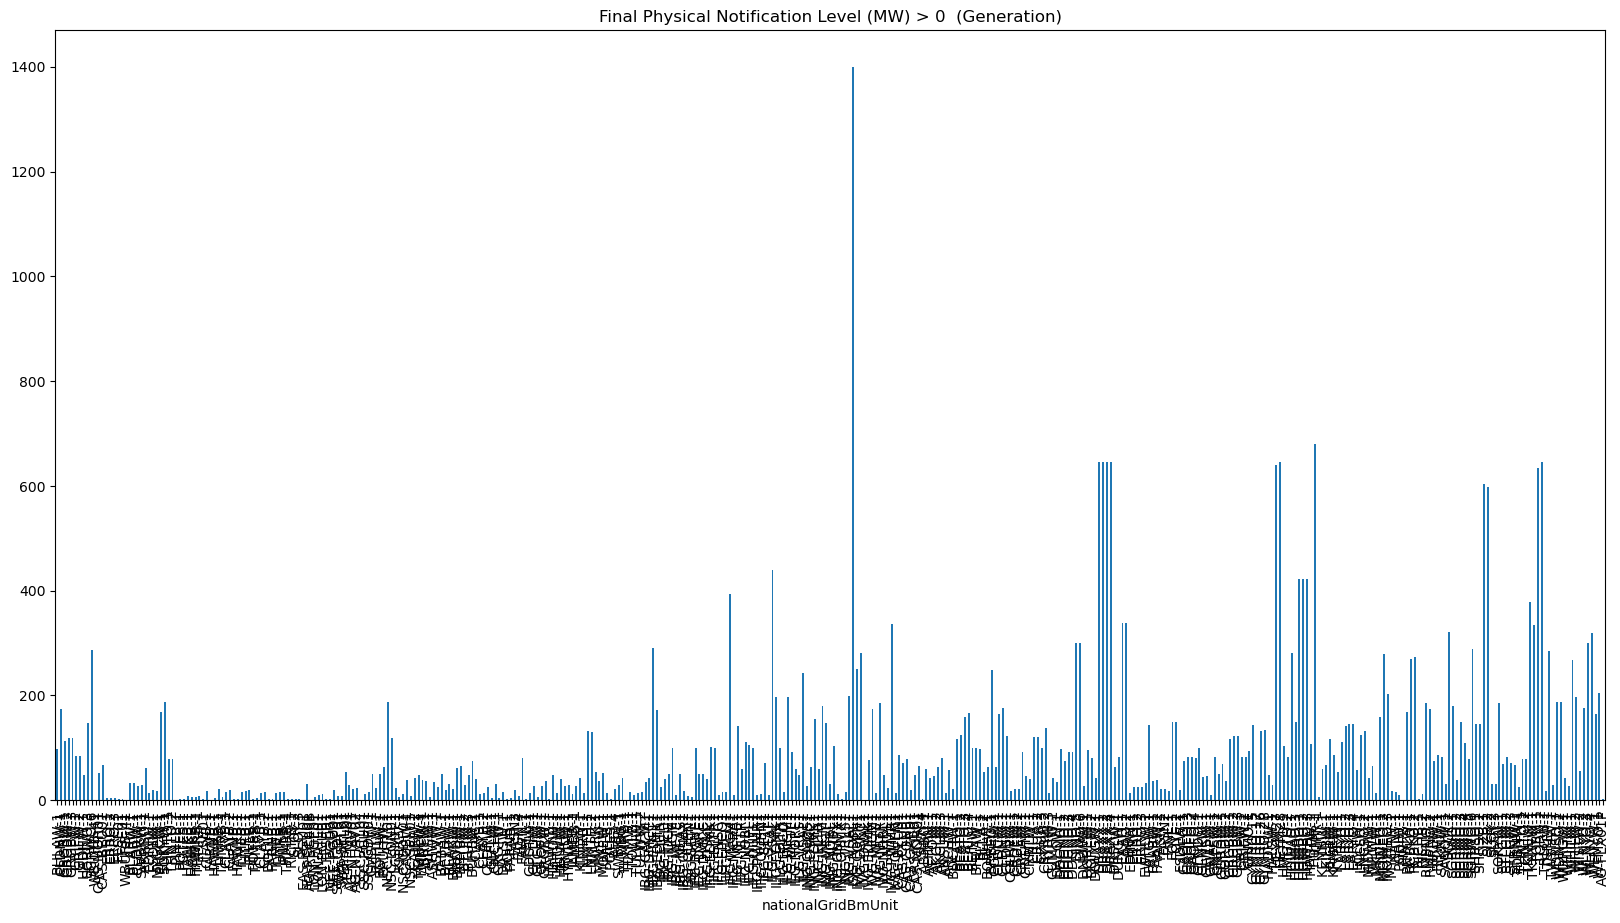

In [4]:
ds_plot[ds_plot > 0].plot(kind='bar', figsize=(20, 10), title='Final Physical Notification Level (MW) > 0  (Generation)')

In [5]:
ds_plot[ds_plot > 0]

nationalGridBmUnit
BHLAW-1       98.0
CLDNW-1      174.0
GRGBW-1      113.0
GRGBW-2      119.0
GRGBW-3      119.0
             ...  
WLNYO-3      299.0
WLNYO-4      319.0
WLNYW-1      164.0
WTMSO-1      204.0
AG-FLX01P      2.0
Name: levelTo, Length: 403, dtype: float64

In [6]:
ds_plot[ds_plot > 0].sum()

38298.0

Difference between BM unit total generation - for example, settlement date 2024-02-02, settlement period 22, has FPN generation 39,200MW, and demand 46,324MW. Expected as lots of non-BM generation on system.	

<Axes: title={'center': 'Final Physical Notification Level (MW) < 0  (Demand)'}, xlabel='nationalGridBmUnit'>

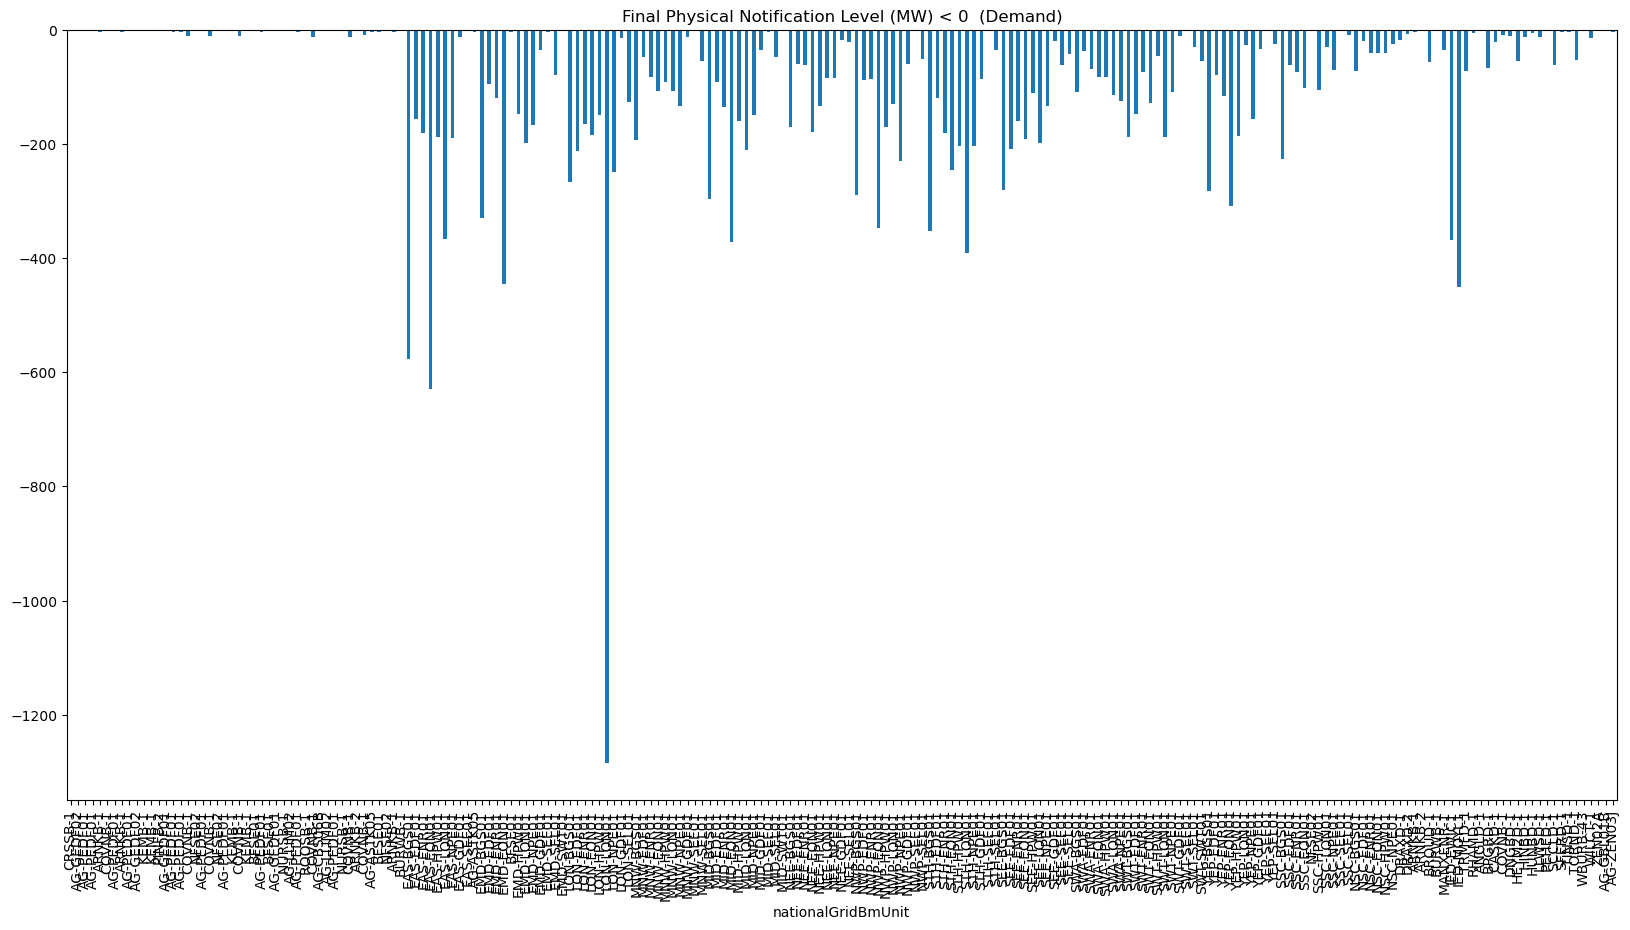

In [7]:
ds_plot[ds_plot < 0].plot(kind='bar', figsize=(20, 10), title='Final Physical Notification Level (MW) < 0  (Demand)')

In [8]:
ds_plot[ds_plot < 0].sum()

-19631.0